# This compares all Machine learning Algorithms performance

1. Logistic Regression
2. Support Vector Machine
3. AdaBoost
4. Random Forest
5. Decision Trees
6. Naive Bayes
7. K Nearest Neighbours
8. Linear Discriminant Analysis


## With Deep learning Model

# Financial Inclusion Survey Data

The objective of this task is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [2]:
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Import the dataset containing VariableDefinitions. This is the full list of variables and their explanations.

In [3]:
VDdata =pd.read_csv('VariableDefinitions.csv')

In [4]:
VDdata.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


## Train.csv is 70% of the data, across the four East African countries (i.e. Kenya, Rwanda, Tanzania, and Uganda)

In [5]:
Train_v2=pd.read_csv('Train_v2.csv')

In [6]:
Train_v2.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
Train_v2.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
Train_v2.shape

(23524, 13)

In [9]:
for col in Train_v2.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(Train_v2[col].unique())) )

Column country has 4 unique instances
Column uniqueid has 8735 unique instances
Column bank_account has 2 unique instances
Column location_type has 2 unique instances
Column cellphone_access has 2 unique instances
Column gender_of_respondent has 2 unique instances
Column relationship_with_head has 6 unique instances
Column marital_status has 5 unique instances
Column education_level has 6 unique instances
Column job_type has 10 unique instances


## Bank Accounts Distribution

In [10]:
print(Train_v2.groupby('bank_account').size())

bank_account
No     20212
Yes     3312
dtype: int64


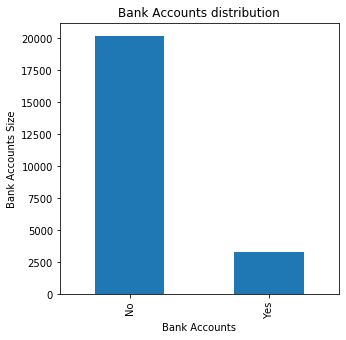

In [11]:
plt.title('Bank Accounts distribution')
plt.xlabel('Bank Accounts')
plt.ylabel('Bank Accounts Size')
Train_v2['bank_account'].value_counts().plot(kind='bar',figsize=(5,5))

In [12]:
Train_v2.dtypes 

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [13]:
for i in Train_v2.columns:
    print(i,Train_v2[i].unique())
    print("_______")

country ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
_______
year [2018 2016 2017]
_______
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
_______
bank_account ['Yes' 'No']
_______
location_type ['Rural' 'Urban']
_______
cellphone_access ['Yes' 'No']
_______
household_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
_______
age_of_respondent [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
_______
gender_of_respondent ['Female' 'Male']
_______
relationship_with_head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
_______
marital_status ['Married/Living together' 'Widowed' 'Single/Never Mar






## Transforming non-numeric datatypes to numeric datatypes

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelEncode = LabelEncoder()

In [16]:
Train_v2 = Train_v2.drop(['uniqueid'], axis=1)

In [17]:
for col in Train_v2.select_dtypes(include=['object']).columns:
    Train_v2[col] = labelEncode.fit_transform(Train_v2[col])

In [18]:
Train_v2.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


## We also need to label encode the year

In [19]:
Train_v2['year'] = labelEncode.fit_transform(Train_v2['year'])

In [20]:
Train_v2.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,24,0,5,2,3,9
1,0,2,0,0,0,5,70,0,1,4,0,4
2,0,2,1,1,1,5,26,1,3,3,5,9
3,0,2,0,0,1,5,34,0,1,2,2,3
4,0,2,0,1,0,8,26,1,0,3,2,5


## Histograms

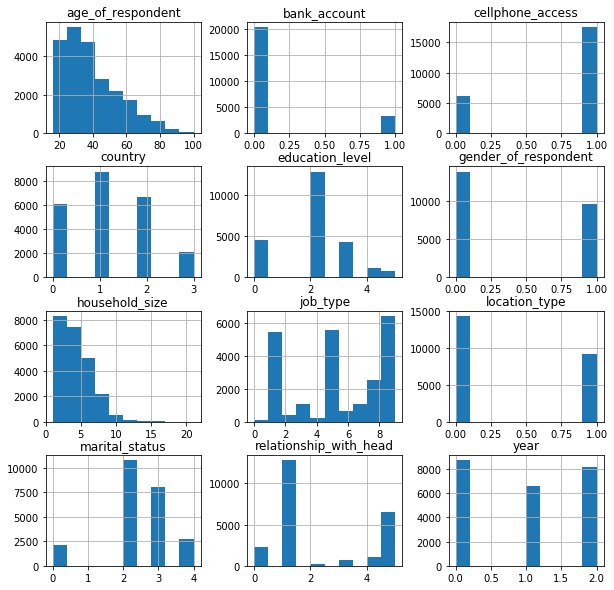

In [21]:
Train_v2.hist(figsize=(10, 10))
plt.show()

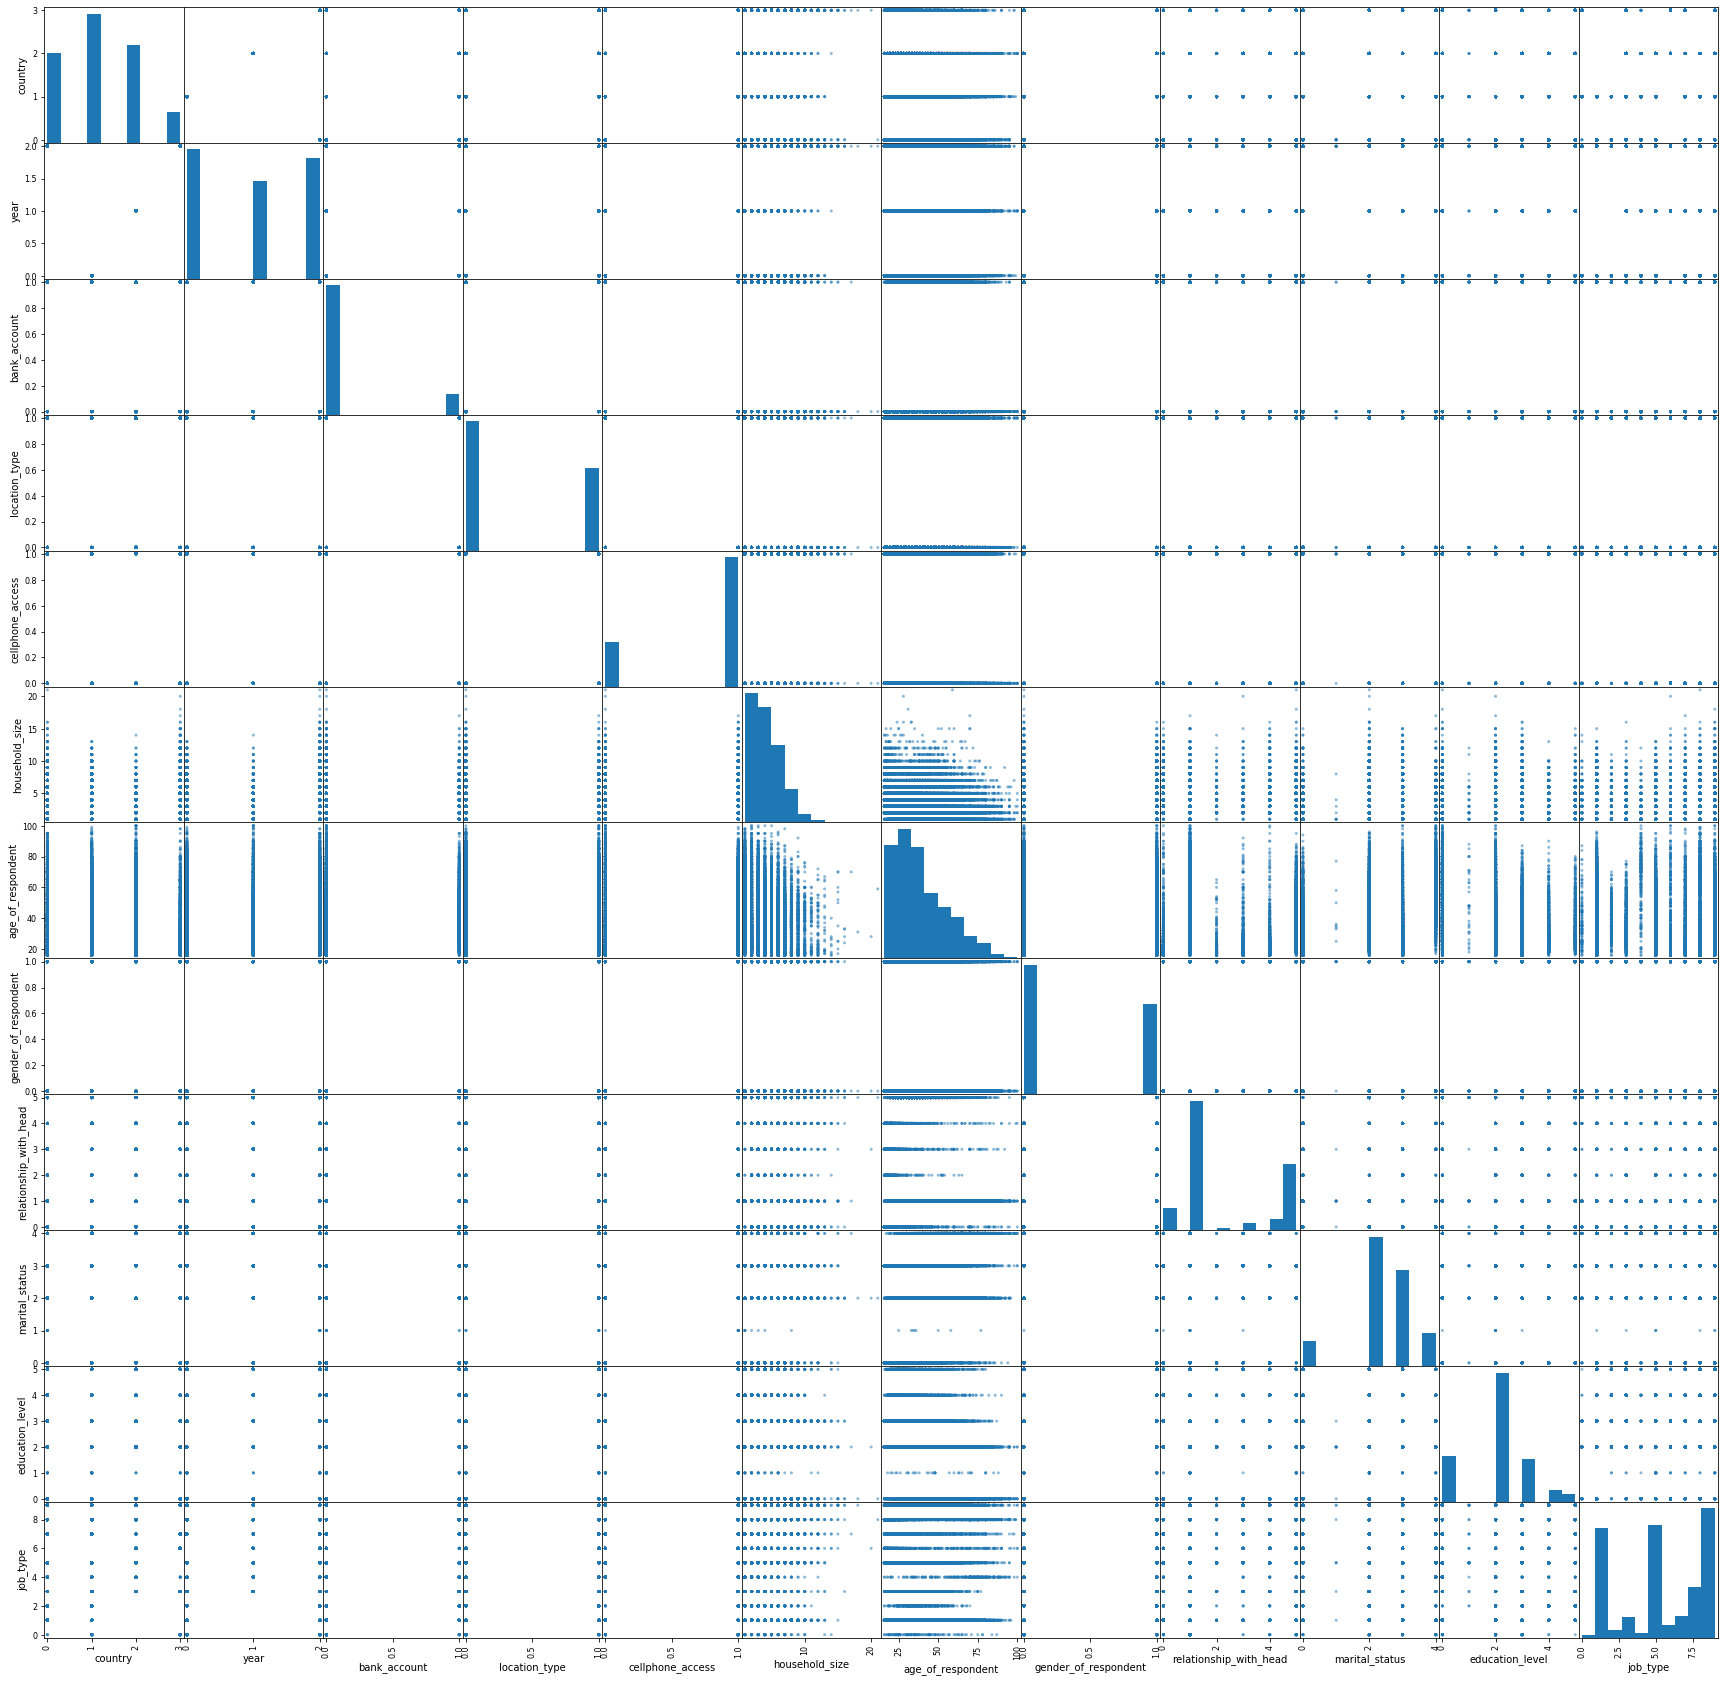

In [22]:
# scatter plot matrix
scatter_matrix(Train_v2,figsize=(30, 30))
plt.show()

## Correlation matrix

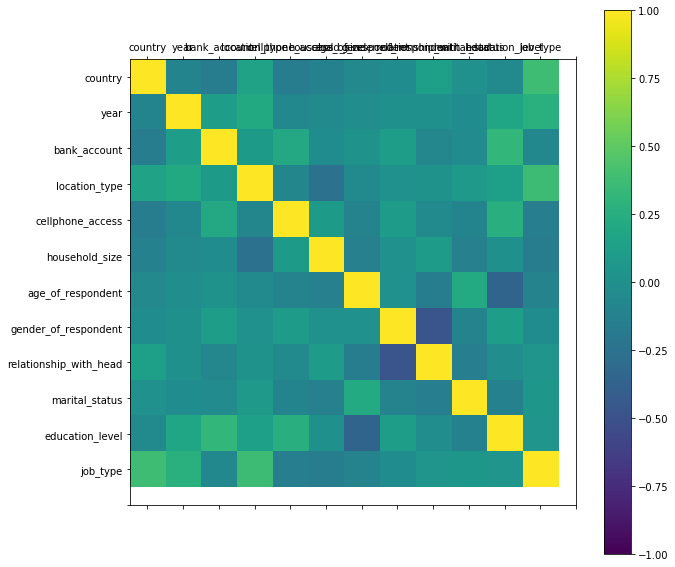

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(Train_v2.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Train_v2.columns)
ax.set_yticklabels(Train_v2.columns)
plt.show()

## Picking X values and y values 

In [24]:
Y = Train_v2['bank_account'].values

In [25]:
Y

array([1, 0, 1, ..., 0, 0, 0])

In [26]:
Train_v2 = Train_v2.drop(['bank_account'], axis=1)

In [27]:
X = Train_v2.values

In [28]:
X

array([[0, 2, 0, ..., 2, 3, 9],
       [0, 2, 0, ..., 4, 0, 4],
       [0, 2, 1, ..., 3, 5, 9],
       ...,
       [3, 2, 0, ..., 4, 2, 7],
       [3, 2, 1, ..., 0, 3, 9],
       [3, 2, 0, ..., 3, 3, 6]])

## Split the data into training and test set

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

## Machine Learning Algorithms

In [30]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('EXT', ExtraTreesClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [31]:
results = []
features = []

In [32]:
for name, model in models:
    kfold = KFold(n_splits=10,random_state=44)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    features.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.875603 (0.007933)
RF: 0.870449 (0.008293)
GBC: 0.887719 (0.008033)
ADAB: 0.884212 (0.008244)
EXT: 0.859821 (0.009707)
LDA: 0.876347 (0.007989)
KNN: 0.868643 (0.007558)
CART: 0.838832 (0.007057)
NB: 0.837876 (0.009291)
SVM: 0.858971 (0.009220)


## Compare the Machine Learning Algorithms

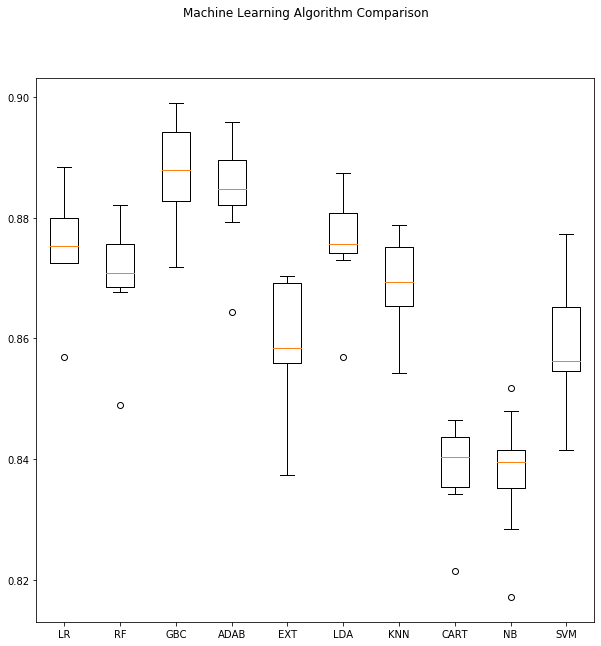

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

In [33]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(features)
plt.show()
plt.hist

# Comparing with  Deep learning Model

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Create the Deep learning Model

In [35]:
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compile the model

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the model

In [37]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=1000, 
                    batch_size=250,
                    validation_split=0.2,
                    verbose=1)

Train on 15055 samples, validate on 3764 samples
Epoch 1/1000
15055/15055 [==============================] - 1s 47us/sample - loss: 0.4466 - accuracy: 0.8369 - val_loss: 0.3802 - val_accuracy: 0.8520
Epoch 2/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.3626 - accuracy: 0.8638 - val_loss: 0.3696 - val_accuracy: 0.8600
Epoch 3/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.3527 - accuracy: 0.8649 - val_loss: 0.3659 - val_accuracy: 0.8557
Epoch 4/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.3401 - accuracy: 0.8708 - val_loss: 0.3454 - val_accuracy: 0.8640
Epoch 5/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.3349 - accuracy: 0.8719 - val_loss: 0.3417 - val_accuracy: 0.8653
Epoch 6/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.3272 - accuracy: 0.8734 - val_loss: 0.3373 - val_accuracy: 0.8661
Epoch 7/1000
15055/15055 [===================

Epoch 108/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2687 - accuracy: 0.8929 - val_loss: 0.3044 - val_accuracy: 0.8751
Epoch 109/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2675 - accuracy: 0.8933 - val_loss: 0.3065 - val_accuracy: 0.8733
Epoch 110/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2692 - accuracy: 0.8915 - val_loss: 0.3043 - val_accuracy: 0.8765
Epoch 111/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2691 - accuracy: 0.8918 - val_loss: 0.3065 - val_accuracy: 0.8757
Epoch 112/1000
15055/15055 [==============================] - 0s 15us/sample - loss: 0.2683 - accuracy: 0.8927 - val_loss: 0.2994 - val_accuracy: 0.8746
Epoch 113/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2696 - accuracy: 0.8919 - val_loss: 0.3031 - val_accuracy: 0.8762
Epoch 114/1000
15055/15055 [==============================] - 0s 16us/sample - los

15055/15055 [==============================] - 0s 18us/sample - loss: 0.2395 - accuracy: 0.9027 - val_loss: 0.3324 - val_accuracy: 0.8759
Epoch 215/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2400 - accuracy: 0.9037 - val_loss: 0.3324 - val_accuracy: 0.8775
Epoch 216/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2384 - accuracy: 0.9046 - val_loss: 0.3281 - val_accuracy: 0.8751
Epoch 217/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2396 - accuracy: 0.9036 - val_loss: 0.3405 - val_accuracy: 0.8751
Epoch 218/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2405 - accuracy: 0.9029 - val_loss: 0.3453 - val_accuracy: 0.8746
Epoch 219/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2413 - accuracy: 0.9025 - val_loss: 0.3410 - val_accuracy: 0.8746
Epoch 220/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.2384 - acc

15055/15055 [==============================] - 0s 16us/sample - loss: 0.2266 - accuracy: 0.9075 - val_loss: 0.3705 - val_accuracy: 0.8706
Epoch 321/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.2181 - accuracy: 0.9116 - val_loss: 0.3740 - val_accuracy: 0.8690
Epoch 322/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.2181 - accuracy: 0.9109 - val_loss: 0.3702 - val_accuracy: 0.8680
Epoch 323/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2194 - accuracy: 0.9113 - val_loss: 0.3837 - val_accuracy: 0.8666
Epoch 324/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2207 - accuracy: 0.9117 - val_loss: 0.3692 - val_accuracy: 0.8677
Epoch 325/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.2161 - accuracy: 0.9122 - val_loss: 0.3706 - val_accuracy: 0.8730
Epoch 326/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.2188 - acc

15055/15055 [==============================] - 0s 17us/sample - loss: 0.2072 - accuracy: 0.9171 - val_loss: 0.4073 - val_accuracy: 0.8688
Epoch 427/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2034 - accuracy: 0.9178 - val_loss: 0.3955 - val_accuracy: 0.8680
Epoch 428/1000
15055/15055 [==============================] - 0s 14us/sample - loss: 0.2056 - accuracy: 0.9170 - val_loss: 0.4042 - val_accuracy: 0.8669
Epoch 429/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2088 - accuracy: 0.9135 - val_loss: 0.4205 - val_accuracy: 0.8634
Epoch 430/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.2067 - accuracy: 0.9152 - val_loss: 0.4011 - val_accuracy: 0.8552
Epoch 431/1000
15055/15055 [==============================] - 0s 15us/sample - loss: 0.2052 - accuracy: 0.9158 - val_loss: 0.4235 - val_accuracy: 0.8648
Epoch 432/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.2079 - acc

15055/15055 [==============================] - 0s 17us/sample - loss: 0.1999 - accuracy: 0.9176 - val_loss: 0.4496 - val_accuracy: 0.8626
Epoch 533/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1915 - accuracy: 0.9214 - val_loss: 0.4492 - val_accuracy: 0.8584
Epoch 534/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1908 - accuracy: 0.9216 - val_loss: 0.4424 - val_accuracy: 0.8536
Epoch 535/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1930 - accuracy: 0.9204 - val_loss: 0.4472 - val_accuracy: 0.8637
Epoch 536/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1946 - accuracy: 0.9199 - val_loss: 0.4368 - val_accuracy: 0.8632
Epoch 537/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1956 - accuracy: 0.9197 - val_loss: 0.4366 - val_accuracy: 0.8592
Epoch 538/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1924 - acc

15055/15055 [==============================] - 0s 18us/sample - loss: 0.1830 - accuracy: 0.9262 - val_loss: 0.4992 - val_accuracy: 0.8576
Epoch 639/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1785 - accuracy: 0.9268 - val_loss: 0.4802 - val_accuracy: 0.8587
Epoch 640/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1805 - accuracy: 0.9256 - val_loss: 0.4964 - val_accuracy: 0.8552
Epoch 641/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1814 - accuracy: 0.9263 - val_loss: 0.4747 - val_accuracy: 0.8544
Epoch 642/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1810 - accuracy: 0.9254 - val_loss: 0.4784 - val_accuracy: 0.8552
Epoch 643/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1859 - accuracy: 0.9257 - val_loss: 0.4909 - val_accuracy: 0.8531
Epoch 644/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1924 - acc

15055/15055 [==============================] - 0s 17us/sample - loss: 0.1772 - accuracy: 0.9281 - val_loss: 0.5207 - val_accuracy: 0.8523
Epoch 745/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1768 - accuracy: 0.9284 - val_loss: 0.5349 - val_accuracy: 0.8528
Epoch 746/1000
15055/15055 [==============================] - 0s 20us/sample - loss: 0.1730 - accuracy: 0.9284 - val_loss: 0.5246 - val_accuracy: 0.8584
Epoch 747/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1735 - accuracy: 0.9288 - val_loss: 0.5507 - val_accuracy: 0.8595
Epoch 748/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1744 - accuracy: 0.9280 - val_loss: 0.5377 - val_accuracy: 0.8544
Epoch 749/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1730 - accuracy: 0.9280 - val_loss: 0.5180 - val_accuracy: 0.8528
Epoch 750/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1759 - acc

15055/15055 [==============================] - 0s 18us/sample - loss: 0.1700 - accuracy: 0.9299 - val_loss: 0.5909 - val_accuracy: 0.8510
Epoch 851/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1675 - accuracy: 0.9328 - val_loss: 0.5524 - val_accuracy: 0.8531
Epoch 852/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1699 - accuracy: 0.9299 - val_loss: 0.5509 - val_accuracy: 0.8512
Epoch 853/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.1661 - accuracy: 0.9317 - val_loss: 0.5705 - val_accuracy: 0.8555
Epoch 854/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.1755 - accuracy: 0.9281 - val_loss: 0.5650 - val_accuracy: 0.8496
Epoch 855/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1673 - accuracy: 0.9310 - val_loss: 0.5644 - val_accuracy: 0.8544
Epoch 856/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.1645 - acc

15055/15055 [==============================] - 0s 16us/sample - loss: 0.1612 - accuracy: 0.9341 - val_loss: 0.6064 - val_accuracy: 0.8390
Epoch 957/1000
15055/15055 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.93 - 0s 17us/sample - loss: 0.1639 - accuracy: 0.9336 - val_loss: 0.5935 - val_accuracy: 0.8475
Epoch 958/1000
15055/15055 [==============================] - 0s 18us/sample - loss: 0.1582 - accuracy: 0.9352 - val_loss: 0.6007 - val_accuracy: 0.8496
Epoch 959/1000
15055/15055 [==============================] - 0s 16us/sample - loss: 0.1599 - accuracy: 0.9333 - val_loss: 0.6071 - val_accuracy: 0.8454
Epoch 960/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1596 - accuracy: 0.9361 - val_loss: 0.6167 - val_accuracy: 0.8512
Epoch 961/1000
15055/15055 [==============================] - 0s 17us/sample - loss: 0.1574 - accuracy: 0.9365 - val_loss: 0.6118 - val_accuracy: 0.8464
Epoch 962/1000
15055/15055 [===========================

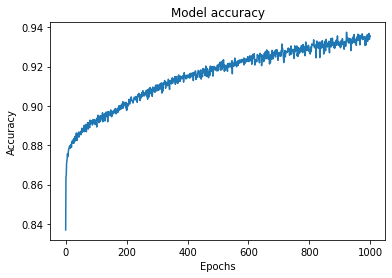

In [38]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

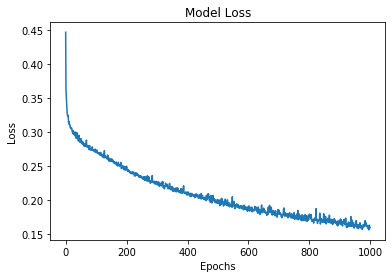

In [39]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

## Model Evaluation

In [41]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.84%
